In [6]:
from reaktoro import *
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from widgets import Dropdown

In [42]:
dd_database = widgets.Dropdown(
    options=['supcrt98.xml', 'supcrt07.xml'],
    value='supcrt98.xml',
    description='Database:',
)
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        db = Database(change['new'])

dd_database.observe(on_change)
display(dd_database)
aquase_phase = ''

Dropdown(description='Database:', options=('supcrt98.xml', 'supcrt07.xml'), value='supcrt98.xml')

In [41]:
dd_aqphase = widgets.Dropdown(
    options=['H', 'O', 'Na', 'Cl', 'C'],
    value='H',
    description='Elements:',
)
out = widgets.Output()

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        with output: print(aquase_phase + ',' + change['new'])
        return aquase_phase + ',' + change['new']
    
def show_aq_phase(phase):
    return phase

dd_aqphase.observe(on_change)
display(dd_aqphase)

#out = widgets.interactive_output(show_aq_phase, {'phase': aquase_phase})
#display(out)

editor = ChemicalEditor(db)
editor.addAqueousPhaseWithElements('H O Na Cl C')
editor.addGaseousPhase(['CO2(g)'])

Dropdown(description='Elements:', options=('H', 'O', 'Na', 'Cl', 'C'), value='H')

NameError: name 'output' is not defined

In [26]:
# Step 4: Construct the chemical system
system = ChemicalSystem(editor)
print(system)

Aqueous                  Gaseous                  
----------------------------------------------------------------------------------------------------
CO(aq)                   CO2(g)                   
CO2(aq)                                           
CO3--                                             
Cl-                                               
ClO-                                              
ClO2-                                             
ClO3-                                             
ClO4-                                             
H+                                                
H2(aq)                                            
H2O(l)                                            
H2O2(aq)                                          
HCO3-                                             
HCl(aq)                                           
HClO(aq)                                          
HClO2(aq)                                         
HO2-                            

In [5]:
# Step 5: Define the chemical equilibrium problem
problem = EquilibriumProblem(system)
problem.setTemperature(60, 'celsius')
problem.setPressure(100, 'bar')
problem.add('H2O', 1.0, 'kg')
problem.add('NaCl', 1.0, 'mol')
problem.add('CO2', 10.0, 'mol')

In [6]:
# Step 6: Calculate the chemical equilibrium state
state = equilibrate(problem)
print(state)

Temperature [K]          Temperature [C]          Pressure [Pa]            Pressure [bar]           
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
333.15                   60                       1e+07                    100                      
Element                  Amount [mol]             Aqueous [mol]            Gaseous [mol]            Dual Potential [kJ/mol]  
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
C                        10                       0.793515                 9.20648                  -280.661                 
Cl                       1                        1                        0                  

In [7]:
# Step 8: Print the amounts of some aqueous speciesk
print('Amount of CO2(aq):', state.speciesAmount('CO2(aq)'))
print('Amount of HCO3-  :', state.speciesAmount('HCO3-'))
print('Amount of CO3--  :', state.speciesAmount('CO3--'))
print('Amount of Na+    :', state.speciesAmount('Na+'))

Amount of CO2(aq): 0.7923219201161625
Amount of HCO3-  : 0.0011932550486751456
Amount of CO3--  : 5.695573946910143e-10
Amount of Na+    : 0.9220810121731402


In [8]:
import sys
from __future__ import print_function
print('hi, stderr', file=sys.stderr)

hi, stderr


$e^{i\pi} + 1 = 0$
$$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$$

In [9]:
print('Amount of C in aqueous phase:', state.elementAmountInPhase('C', 'Aqueous'))
print('Amount of C in gaseous phase:', state.elementAmountInPhase('C', 'Gaseous'))

Amount of C in aqueous phase: 0.7935151757343951
Amount of C in gaseous phase: 9.206484824265605


Code block:
```python
print "Hello World"
def f(x):
    """a docstring"""
    return x**2
if (i=0; i<n; i++) {
  printf("hello %d\n", i);
  x += 4;
}
```

# Heading 1
# Heading 2
## Heading 2.1
## Heading 2.2

 *literal asterisks*
 **literal asterisks**
 

<img src="../images/python_logo.svg" />

<video controls src="../images/animation.m4v" />

In [10]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 3*np.pi, 500)

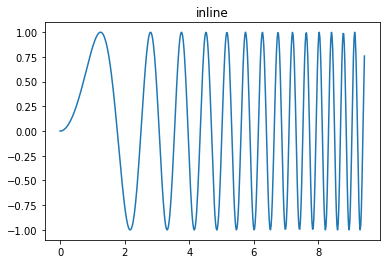

In [11]:
%matplotlib inline
plt.plot(x, np.sin(x**2))
plt.title('inline');

In [ ]:
#%load http://matplotlib.sourceforge.net/mpl_examples/pylab_examples/integral_demo.py

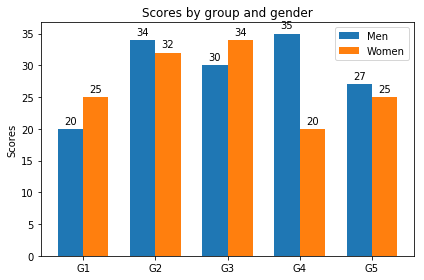

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

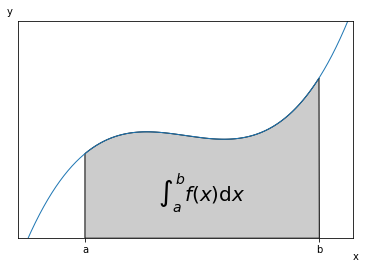

In [17]:
#!/usr/bin/env python

# implement the example graphs/integral from pyx
from pylab import *
from matplotlib.patches import Polygon

def func(x):
    return (x-3)*(x-5)*(x-7)+85

ax = subplot(111)

a, b = 2, 9 # integral area
x = arange(0, 10, 0.01)
y = func(x)
plot(x, y, linewidth=1)

# make the shaded region
ix = arange(a, b, 0.01)
iy = func(ix)
verts = [(a,0)] + list(zip(ix,iy)) + [(b,0)]
poly = Polygon(verts, facecolor='0.8', edgecolor='k')
ax.add_patch(poly)

text(0.5 * (a + b), 30,
     r"$\int_a^b f(x)\mathrm{d}x$", horizontalalignment='center',
     fontsize=20)

axis([0,10, 0, 180])
figtext(0.9, 0.05, 'x')
figtext(0.1, 0.9, 'y')
ax.set_xticks((a,b))
ax.set_xticklabels(('a','b'))
ax.set_yticks([])
show()